In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
election_cleaned = pd.read_csv('general_election.csv')

In [3]:
election_cleaned.head()

,start_date,sample_size,total_biden,total_trump,w_biden,w_trump
0,2020-04-10,1200.0,52800.0,58800.0,44.000000,49.000000
1,2020-04-12,1166.0,55968.0,50138.0,48.000000,43.000000
2,2020-04-13,900.0,44100.0,37800.0,49.000000,42.000000
3,2020-04-14,1318.0,63264.0,61946.0,48.000000,47.000000
4,2020-04-16,2020.0,98000.0,82300.0,48.514851,40.742574


In [4]:
election_cleaned.index = election_cleaned.start_date

In [5]:
election_cleaned = election_cleaned.drop('start_date', axis = 1)

In [6]:
election_cleaned.head()

,sample_size,total_biden,total_trump,w_biden,w_trump
start_date,,,,,
2020-04-10,1200.0,52800.0,58800.0,44.000000,49.000000
2020-04-12,1166.0,55968.0,50138.0,48.000000,43.000000
2020-04-13,900.0,44100.0,37800.0,49.000000,42.000000
2020-04-14,1318.0,63264.0,61946.0,48.000000,47.000000
2020-04-16,2020.0,98000.0,82300.0,48.514851,40.742574


In [7]:
from datetime import datetime
dates = list(election_cleaned.index)
converted = [datetime.strptime(dates[i], '%Y-%m-%d') for i in range(len(dates))]

In [8]:
months = [converted[i].month for i in range(len(converted))]
unique_months = np.unique(months)

In [9]:
import calendar
month_names = [calendar.month_name[unique_months[i]] for i in range(len(unique_months))]
month_names

['April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']

In [10]:
len(election_cleaned)/8

20.125

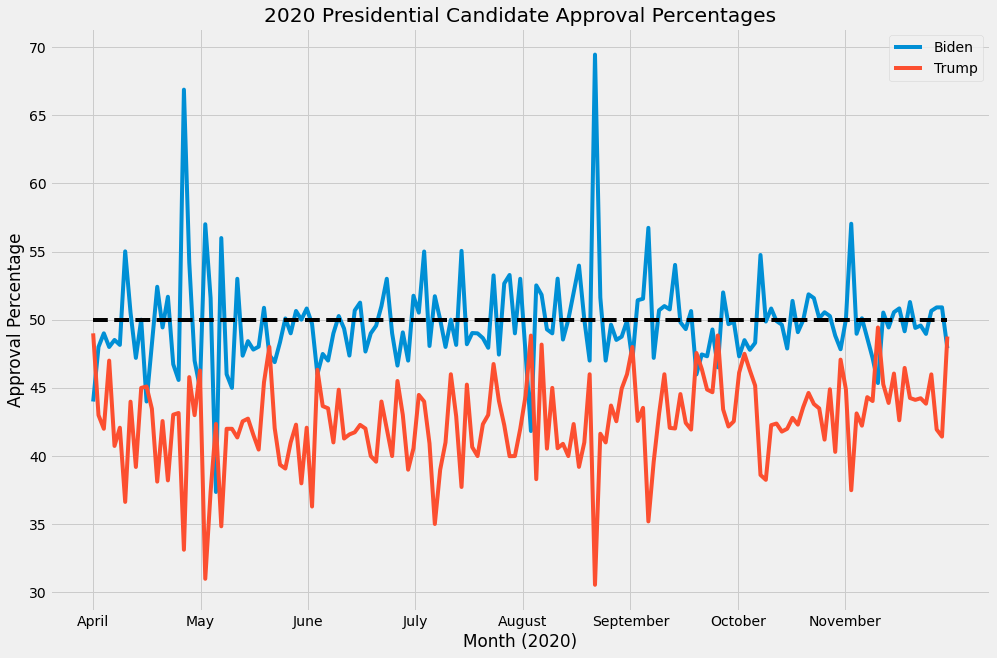

<Figure size 432x288 with 0 Axes>

In [11]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(15,10))
plt.plot(election_cleaned.index, election_cleaned['w_biden'], label='Biden')
plt.plot(election_cleaned.index, election_cleaned['w_trump'], label='Trump')
plt.plot(election_cleaned.index, [50 for i in election_cleaned.index], '--' ,color='black')
plt.xticks(np.arange(len(election_cleaned), step = len(election_cleaned)/len(month_names)))
ax.set_xticklabels(month_names)
plt.xlabel('Month (2020)')
plt.ylabel('Approval Percentage')
plt.title('2020 Presidential Candidate Approval Percentages')
plt.legend()
plt.show()
plt.savefig('overall_approval.png', bbox_inches='tight')

# Month analysis

In [12]:
#month analysis from October1-November1
oct_nov = election_cleaned[election_cleaned.index >= '2020-10-01']

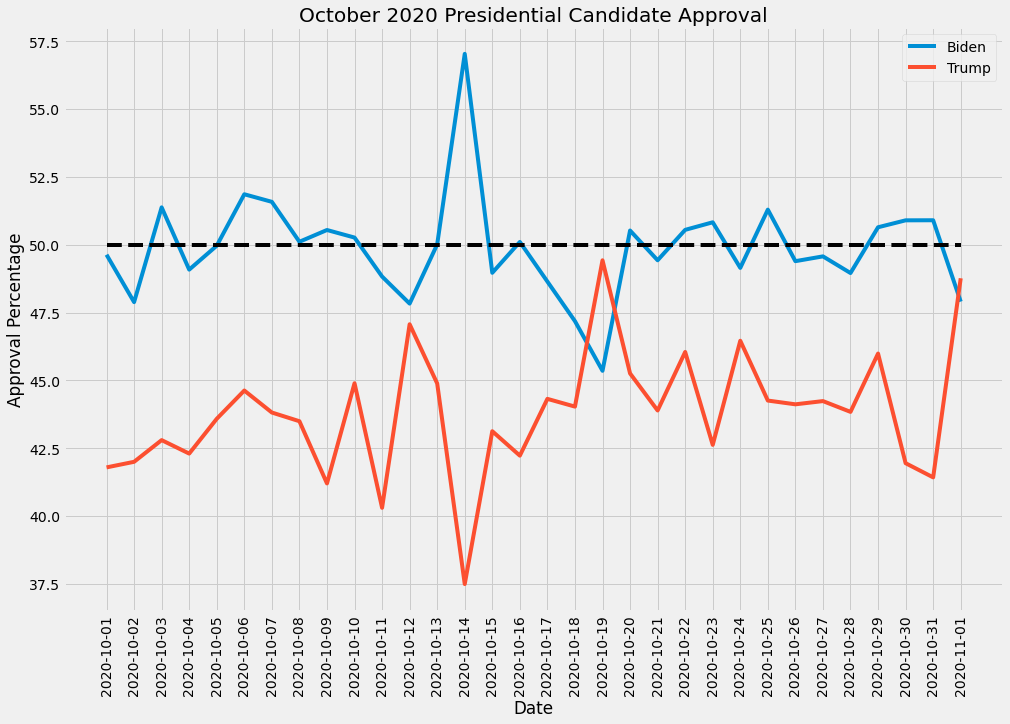

In [13]:
fig, ax = plt.subplots(figsize = (15,10))
plt.plot(oct_nov.index, oct_nov['w_biden'], label = 'Biden')
plt.plot(oct_nov.index, oct_nov['w_trump'], label = 'Trump')
plt.plot(oct_nov.index, [50]*len(oct_nov), '--', color = 'black')
plt.xticks(rotation = 90)
plt.xlabel('Date')
plt.ylabel('Approval Percentage')
plt.title('October 2020 Presidential Candidate Approval')
plt.legend()

# Tweet Data

In [14]:
df = pd.read_csv('20201121120238_biden_tweet_scores.csv')

In [15]:
df

,date,TFIDF
0,2020-08-11,"[('win', 0.18158107361427933), ('go', 0.143782..."
1,2020-08-12,"[('kamalaharris', 0.13117880488284), ('worried..."
2,2020-08-13,"[('82', 0.39664779644249554), ('days', 0.17401..."
3,2020-08-14,"[('story', 0.2673950433368432), ('social', 0.2..."
4,2020-08-15,"[('know', 0.11188818823996126), ('vice', 0.098..."
...,...,...
85,2020-11-04,"[('count', 0.145789478930796), ('victory', 0.1..."
86,2020-11-05,"[('counted', 0.29949649183368193), ('faith', 0..."
87,2020-11-06,"[('opponents', 0.2302326126930348), ('enemies'..."
88,2020-11-07,"[('bottom', 0.12585516765201687), ('heart', 0...."


In [165]:
import string
def replace_punc(current):
    for s in string.punctuation:
        if s in current and s != ',' and s != '.':
            current = current.replace(s, '')
    return current    

In [166]:
current = df.TFIDF[0]
t = replace_punc(current)
t

'win, 0.18158107361427933, go, 0.14378253674379096, kamalaharris, 0.1432401512127007, lets, 0.13795912247815936, biggest, 0.07990786076173652, thanks, 0.07213541926263342, supporters, 0.07028081658729284, servants, 0.06999666996044039, fearless, 0.06999666996044039, finest, 0.06999666996044039, together, 0.06484613095622625, fundraising, 0.06353765247921365, track, 0.06353765247921365, announce, 0.06320110936671543, picked, 0.06320110936671543, countrys, 0.06320110936671543, guy, 0.05922596124800794, fighter, 0.05922596124800794, proud, 0.058031393043996675, ever, 0.05623080392509172, little, 0.054217866897360974, thiscampaign, 0.05173666910119507, mate, 0.05091911947950595, ill, 0.05008116377057287, join, 0.04901031143500965, insurance, 0.047597735573099466, heartless, 0.047597735573099466, attorney, 0.04671386344496358, lifted, 0.04671386344496358, closely, 0.04671386344496358, like, 0.04660375975064803, protected, 0.04377571048765804, great, 0.042220068548124545, abuse, 0.0416910577

In [167]:
no_punc = []
for i in range(len(df)):
    current = df['TFIDF'][i]
    no_punc.append([replace_punc(current)])


In [168]:
no_punc

[['win, 0.18158107361427933, go, 0.14378253674379096, kamalaharris, 0.1432401512127007, lets, 0.13795912247815936, biggest, 0.07990786076173652, thanks, 0.07213541926263342, supporters, 0.07028081658729284, servants, 0.06999666996044039, fearless, 0.06999666996044039, finest, 0.06999666996044039, together, 0.06484613095622625, fundraising, 0.06353765247921365, track, 0.06353765247921365, announce, 0.06320110936671543, picked, 0.06320110936671543, countrys, 0.06320110936671543, guy, 0.05922596124800794, fighter, 0.05922596124800794, proud, 0.058031393043996675, ever, 0.05623080392509172, little, 0.054217866897360974, thiscampaign, 0.05173666910119507, mate, 0.05091911947950595, ill, 0.05008116377057287, join, 0.04901031143500965, insurance, 0.047597735573099466, heartless, 0.047597735573099466, attorney, 0.04671386344496358, lifted, 0.04671386344496358, closely, 0.04671386344496358, like, 0.04660375975064803, protected, 0.04377571048765804, great, 0.042220068548124545, abuse, 0.04169105

In [171]:
pd.DataFrame(no_punc)

,0
0,"win, 0.18158107361427933, go, 0.14378253674379..."
1,"kamalaharris, 0.13117880488284, worried, 0.060..."
2,"82, 0.39664779644249554, days, 0.1740181750406..."
3,"story, 0.2673950433368432, social, 0.239183947..."
4,"know, 0.11188818823996126, vice, 0.09859081941..."
...,...
85,"count, 0.145789478930796, victory, 0.139312675..."
86,"counted, 0.29949649183368193, faith, 0.1213075..."
87,"opponents, 0.2302326126930348, enemies, 0.2157..."
88,"bottom, 0.12585516765201687, heart, 0.11756780..."


In [172]:
l = []
for i in range(len(no_punc)):
    for j in range(len(no_punc[i])):
        l.append(no_punc[i][j].split(', '))

In [248]:
def words_nums_day(data):
    nums = []
    words = []
    for i in range(len(data)):
        if data[i][1] == '.':
            nums.append(float(data[i]))
        else:
            words.append(data[i])
    return nums, words

In [249]:
nums1, words1 = words_nums_day(l[0])

In [250]:
len(nums1)

102

In [251]:
len(words1)

102

In [252]:
day1 = pd.DataFrame([words1, nums1]).T
day1.columns = ['words', 'TFIDF']

In [253]:
day1

,words,TFIDF
0,win,0.181581
1,go,0.143783
2,kamalaharris,0.14324
3,lets,0.137959
4,biggest,0.0799079
...,...,...
97,need,0.0176735
98,people,0.0172282
99,time,0.0160681
100,get,0.0143962


In [259]:
def get_day_dataframe(d, date):
    nums, words = words_nums_day(d)
    day_df = pd.DataFrame([words, nums]).T
    day_df.columns = ['words_' + date, 'nums_'+date]
    return day_df

In [260]:
day3 = get_day_dataframe(l[2], df.date[2])
day2 = get_day_dataframe(l[1], df.date[1])

In [261]:
day2

,words_2020-08-12,nums_2020-08-12
0,kamalaharris,0.131179
1,worried,0.0605617
2,lets,0.0551836
3,work,0.0519051
4,chose,0.0466837
...,...,...
217,americans,0.00681251
218,better,0.0066568
219,today,0.00658587
220,country,0.00574351


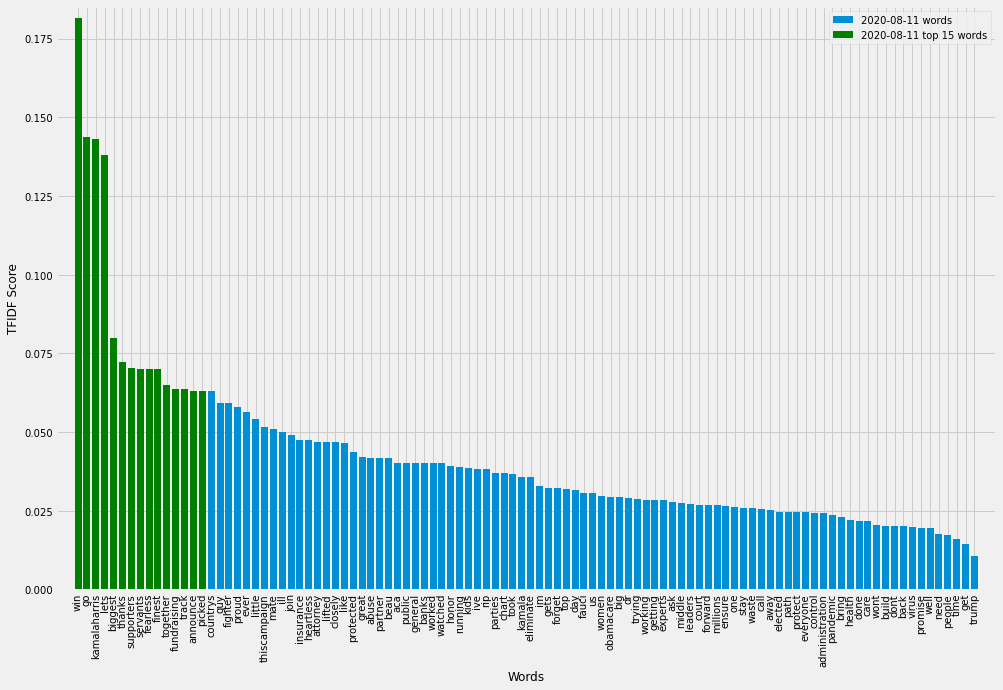

In [263]:
fig, ax = plt.subplots(figsize = (15,10))
plt.bar(day1.words, day1.TFIDF, label = str(df.date[0]) + ' words')
plt.bar(day1.words[0:15], day1.TFIDF[0:15], color = 'green', label = df.date[0] + ' top 15 words')
plt.margins(.02)
plt.xticks(rotation = 90)
ax.tick_params(axis='both', which='minor', labelsize=8)
plt.xlabel('Words')
plt.ylabel('TFIDF Score')
plt.legend()

In [ ]:
#make line graphwith points labeled as top scoring word/day and maybe also /month or something